In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and y variables

In [15]:
X = df.drop(columns=['math score'], axis = 1)


In [16]:
y = df['math score']

In [17]:
#Creating pipeline for numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [20]:
X.shape

(1000, 19)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Creating an evaluate function to give all metrics after model training

In [27]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("Rmse : ",model_train_rmse)
    print("Mae : ",model_train_mae)
    print("R2_score",model_train_r2)

    print("-"*35)

    print("Model performance for Testing set")
    print("Rmse : ",model_test_rmse)
    print("Mae : ",model_test_mae)
    print("R2_score",model_test_r2)
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")




Linear Regression
Model performance for Training set
Rmse :  5.327381844250807
Mae :  4.2787890625
R2_score 0.8741126023364878
-----------------------------------
Model performance for Testing set
Rmse :  5.40960336750764
Mae :  4.2259375
R2_score 0.8797402769404664


Lasso
Model performance for Training set
Rmse :  6.593815587795566
Mae :  5.206302661246526
R2_score 0.8071462015863456
-----------------------------------
Model performance for Testing set
Rmse :  6.51969453566742
Mae :  5.157881810347763
R2_score 0.8253197323627852


Ridge
Model performance for Training set
Rmse :  5.323324922741654
Mae :  4.264987823725981
R2_score 0.8743042615212909
-----------------------------------
Model performance for Testing set
Rmse :  5.390387016935639
Mae :  4.211100688014261
R2_score 0.8805931485028737


KNeighborsRegressor
Model performance for Training set
Rmse :  5.712219358533074
Mae :  4.51875
R2_score 0.8552680689060966
-----------------------------------
Model performance for Testing 

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879740
8,AdaBoostRegressor,0.854121
5,RandomForestRegressor,0.852187
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783898
4,DecisionTree,0.746341


## Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy : ",score)

Accuracy :  87.97402769404664


## Plot y_pred and y_test

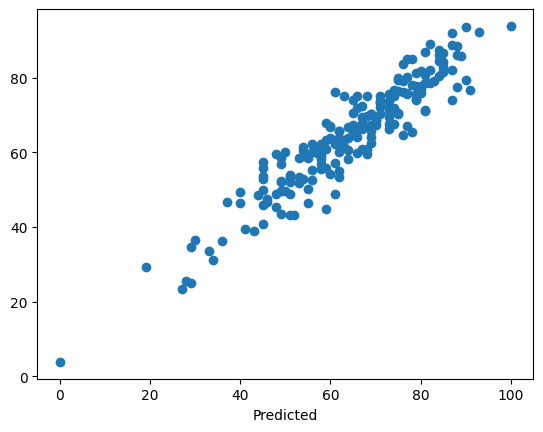

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.xlabel("Predicted");

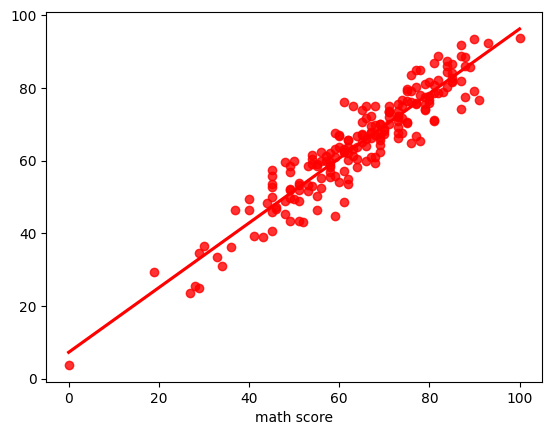

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between actual and predicted values

In [36]:
pred_df = pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
